In [1]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Simple Linear Regression with Synthetic Data

In this first Colab, you'll explore linear regression with a simple database. 

## Learning objectives:

After doing this exercise, you'll know how to do the following:

  * Run Colabs.
  * Tune the following [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter):
    * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
    * number of [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
    * [batch size](https://developers.google.com/machine-learning/glossary/#batch_size)
  * Interpret different kinds of [loss curves](https://developers.google.com/machine-learning/glossary/#loss_curve).

## About Colabs

Machine Learning Crash Course uses Colaboratories (**Colabs**) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). Like all Jupyter Notebooks, a Colab consists of two kinds of components:

  * **Text cells**, which contain explanations. You are currently reading a text cell.
  * **Code cells**, which contain Python code for you to run. Code cells have a light gray background.

You *read* the text cells and *run* the code cells.

### Running code cells

You must run code cells in order. In other words, you may only run a code cell once all the code cells preceding it have already been run. 

To run a code cell:

  1. Place the cursor anywhere inside the [ ] area at the top left of a code cell. The area inside the [ ] will display an arrow.
  2. Click the arrow.

Alternatively, you may invoke **Runtime->Run all**. Note, though, that some of the code cells will fail because not all the coding is complete. (You'll complete the coding as part of the exercise.)

### Understanding hidden code cells

We've **hidden** the code in code cells that don't advance the learning objectives. For example, we've hidden the code that plots graphs. However, **you must still run code cells containing hidden code**. You'll know that the code is hidden because you'll see a title (for example, "Load the functions that build and train a model") without seeing the code.

To view the hidden code, just double click the header.

### Why did you see an error?

If a code cell returns an error when you run it, consider two common problems:

  * You didn't run *all* of the code cells preceding the current code cell.
  * If the code cell is labeled as a **Task**, then you haven't written the necessary code. 

## Import relevant modules

The following cell imports the packages that the program requires:

In [2]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds an empty model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass. 

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the headline to explore this code.

In [3]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


## Define plotting functions

We're using a popular Python library called [Matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) to create the following two plots:

*  a plot of the feature values vs. the label values, and a line showing the output of the trained model.
*  a [loss curve](https://developers.google.com/machine-learning/glossary/#loss_curve).

We hid the following code cell because learning Matplotlib is not relevant to the learning objectives. Regardless, you must still run all hidden code cells.

In [4]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Define the dataset

The dataset consists of 12 [examples](https://developers.google.com/machine-learning/glossary/#example). Each example consists of one [feature](https://developers.google.com/machine-learning/glossary/#feature) and one [label](https://developers.google.com/machine-learning/glossary/#label).


In [5]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

## Specify the hyperparameters

The hyperparameters in this Colab are as follows:

  * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
  * [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
  * [batch_size](https://developers.google.com/machine-learning/glossary/#batch_size)

The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

Epoch 1/10


C:\Users\rodri\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 367ms/step - loss: 953.6906 - root_mean_squared_error: 30.8819
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 937.6448 - root_mean_squared_error: 30.6210
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 926.1360 - root_mean_squared_error: 30.4325
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 916.5773 - root_mean_squared_error: 30.2750
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 908.1491 - root_mean_squared_error: 30.1355
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 900.4711 - root_mean_squared_error: 30.0079
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 893.3320 - root_mean_squared_error: 29.8887
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 886.6001 - root_mean_squared_error: 29.7758
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 880.1874 - root_mean_square

C:\Users\rodri\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


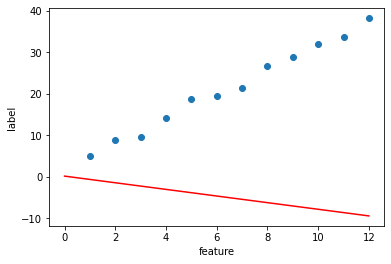

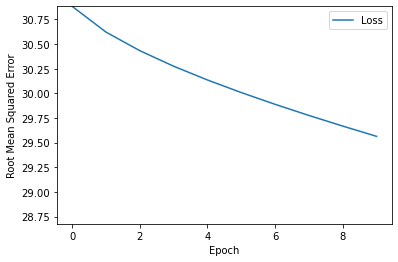

In [6]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 1: Examine the graphs

Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots.  Does it?  Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train.  That said, unless you are an extremely lucky person, the red line probably *doesn't* align nicely with the blue dots.  

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

## Task 2: Increase the number of epochs

Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zero slope or nearly zero slope), which indicates that training has [converged](http://developers.google.com/machine-learning/glossary/#convergence).

In Task 1, the training loss did not converge. One possible solution is to train for more epochs.  Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

Epoch 1/400


C:\Users\rodri\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 337ms/step - loss: 347.6389 - root_mean_squared_error: 18.6451
Epoch 2/400
1/1 [==============================] - 0s 6ms/step - loss: 337.9834 - root_mean_squared_error: 18.3843
Epoch 3/400
1/1 [==============================] - 0s 8ms/step - loss: 331.1101 - root_mean_squared_error: 18.1964
Epoch 4/400
1/1 [==============================] - 0s 10ms/step - loss: 325.4325 - root_mean_squared_error: 18.0397
Epoch 5/400
1/1 [==============================] - 0s 7ms/step - loss: 320.4490 - root_mean_squared_error: 17.9011
Epoch 6/400
1/1 [==============================] - 0s 8ms/step - loss: 315.9275 - root_mean_squared_error: 17.7743
Epoch 7/400
1/1 [==============================] - 0s 7ms/step - loss: 311.7387 - root_mean_squared_error: 17.6561
Epoch 8/400
1/1 [==============================] - 0s 7ms/step - loss: 307.8026 - root_mean_squared_error: 17.5443
Epoch 9/400
1/1 [==============================] - 0s 6ms/step - loss: 304.0652 - root_me

1/1 [==============================] - 0s 6ms/step - loss: 152.9098 - root_mean_squared_error: 12.3657
Epoch 72/400
1/1 [==============================] - 0s 7ms/step - loss: 150.9921 - root_mean_squared_error: 12.2879
Epoch 73/400
1/1 [==============================] - 0s 7ms/step - loss: 149.0874 - root_mean_squared_error: 12.2101
Epoch 74/400
1/1 [==============================] - 0s 7ms/step - loss: 147.1955 - root_mean_squared_error: 12.1324
Epoch 75/400
1/1 [==============================] - 0s 7ms/step - loss: 145.3165 - root_mean_squared_error: 12.0547
Epoch 76/400
1/1 [==============================] - 0s 6ms/step - loss: 143.4504 - root_mean_squared_error: 11.9771
Epoch 77/400
1/1 [==============================] - 0s 7ms/step - loss: 141.5972 - root_mean_squared_error: 11.8995
Epoch 78/400
1/1 [==============================] - 0s 7ms/step - loss: 139.7567 - root_mean_squared_error: 11.8219
Epoch 79/400
1/1 [==============================] - 0s 5ms/step - loss: 137.9291 - ro

1/1 [==============================] - 0s 6ms/step - loss: 48.2857 - root_mean_squared_error: 6.9488
Epoch 143/400
1/1 [==============================] - 0s 6ms/step - loss: 47.2610 - root_mean_squared_error: 6.8747
Epoch 144/400
1/1 [==============================] - 0s 6ms/step - loss: 46.2486 - root_mean_squared_error: 6.8006
Epoch 145/400
1/1 [==============================] - 0s 6ms/step - loss: 45.2483 - root_mean_squared_error: 6.7267
Epoch 146/400
1/1 [==============================] - 0s 5ms/step - loss: 44.2602 - root_mean_squared_error: 6.6528
Epoch 147/400
1/1 [==============================] - 0s 6ms/step - loss: 43.2843 - root_mean_squared_error: 6.5791
Epoch 148/400
1/1 [==============================] - 0s 10ms/step - loss: 42.3204 - root_mean_squared_error: 6.5054
Epoch 149/400
1/1 [==============================] - 0s 7ms/step - loss: 41.3687 - root_mean_squared_error: 6.4319
Epoch 150/400
1/1 [==============================] - 0s 7ms/step - loss: 40.4291 - root_mean_

1/1 [==============================] - 0s 8ms/step - loss: 4.5012 - root_mean_squared_error: 2.1216
Epoch 214/400
1/1 [==============================] - 0s 8ms/step - loss: 4.2718 - root_mean_squared_error: 2.0668
Epoch 215/400
1/1 [==============================] - 0s 5ms/step - loss: 4.0516 - root_mean_squared_error: 2.0129
Epoch 216/400
1/1 [==============================] - 0s 7ms/step - loss: 3.8405 - root_mean_squared_error: 1.9597
Epoch 217/400
1/1 [==============================] - 0s 8ms/step - loss: 3.6384 - root_mean_squared_error: 1.9074
Epoch 218/400
1/1 [==============================] - 0s 6ms/step - loss: 3.4451 - root_mean_squared_error: 1.8561
Epoch 219/400
1/1 [==============================] - 0s 6ms/step - loss: 3.2605 - root_mean_squared_error: 1.8057
Epoch 220/400
1/1 [==============================] - 0s 8ms/step - loss: 3.0846 - root_mean_squared_error: 1.7563
Epoch 221/400
1/1 [==============================] - 0s 6ms/step - loss: 2.9171 - root_mean_squared_er

Epoch 285/400
1/1 [==============================] - 0s 7ms/step - loss: 0.8757 - root_mean_squared_error: 0.9358
Epoch 286/400
1/1 [==============================] - 0s 8ms/step - loss: 0.8757 - root_mean_squared_error: 0.9358
Epoch 287/400
1/1 [==============================] - 0s 6ms/step - loss: 0.8757 - root_mean_squared_error: 0.9358
Epoch 288/400
1/1 [==============================] - 0s 6ms/step - loss: 0.8757 - root_mean_squared_error: 0.9358
Epoch 289/400
1/1 [==============================] - 0s 6ms/step - loss: 0.8756 - root_mean_squared_error: 0.9358
Epoch 290/400
1/1 [==============================] - 0s 7ms/step - loss: 0.8756 - root_mean_squared_error: 0.9357
Epoch 291/400
1/1 [==============================] - 0s 7ms/step - loss: 0.8756 - root_mean_squared_error: 0.9357
Epoch 292/400
1/1 [==============================] - 0s 5ms/step - loss: 0.8756 - root_mean_squared_error: 0.9357
Epoch 293/400
1/1 [==============================] - 0s 7ms/step - loss: 0.8755 - root_m

1/1 [==============================] - 0s 6ms/step - loss: 0.8763 - root_mean_squared_error: 0.9361
Epoch 357/400
1/1 [==============================] - 0s 7ms/step - loss: 0.8761 - root_mean_squared_error: 0.9360
Epoch 358/400
1/1 [==============================] - 0s 7ms/step - loss: 0.8761 - root_mean_squared_error: 0.9360
Epoch 359/400
1/1 [==============================] - 0s 7ms/step - loss: 0.8761 - root_mean_squared_error: 0.9360
Epoch 360/400
1/1 [==============================] - 0s 6ms/step - loss: 0.8763 - root_mean_squared_error: 0.9361
Epoch 361/400
1/1 [==============================] - 0s 7ms/step - loss: 0.8765 - root_mean_squared_error: 0.9362
Epoch 362/400
1/1 [==============================] - 0s 7ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 363/400
1/1 [==============================] - 0s 6ms/step - loss: 0.8771 - root_mean_squared_error: 0.9365
Epoch 364/400
1/1 [==============================] - 0s 7ms/step - loss: 0.8774 - root_mean_squared_er

C:\Users\rodri\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


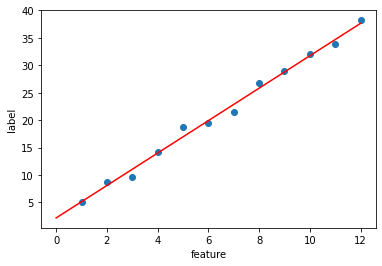

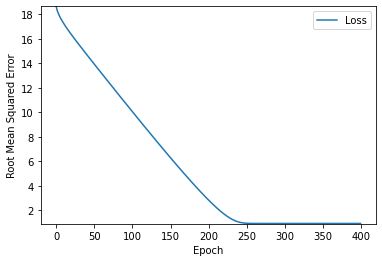

In [7]:
learning_rate=0.01
epochs= 400
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/450


C:\Users\rodri\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 336ms/step - loss: 705.4072 - root_mean_squared_error: 26.5595
Epoch 2/450
1/1 [==============================] - 0s 6ms/step - loss: 691.6175 - root_mean_squared_error: 26.2986
Epoch 3/450
1/1 [==============================] - 0s 6ms/step - loss: 681.7453 - root_mean_squared_error: 26.1103
Epoch 4/450
1/1 [==============================] - 0s 6ms/step - loss: 673.5568 - root_mean_squared_error: 25.9530
Epoch 5/450
1/1 [==============================] - 0s 6ms/step - loss: 666.3449 - root_mean_squared_error: 25.8137
Epoch 6/450
1/1 [==============================] - 0s 6ms/step - loss: 659.7814 - root_mean_squared_error: 25.6862
Epoch 7/450
1/1 [==============================] - 0s 7ms/step - loss: 653.6841 - root_mean_squared_error: 25.5672
Epoch 8/450
1/1 [==============================] - 0s 6ms/step - loss: 647.9395 - root_mean_squared_error: 25.4547
Epoch 9/450
1/1 [==============================] - 0s 8ms/step - loss: 642.4716 - root_mea

1/1 [==============================] - 0s 8ms/step - loss: 407.7758 - root_mean_squared_error: 20.1935
Epoch 72/450
1/1 [==============================] - 0s 8ms/step - loss: 404.5677 - root_mean_squared_error: 20.1139
Epoch 73/450
1/1 [==============================] - 0s 8ms/step - loss: 401.3728 - root_mean_squared_error: 20.0343
Epoch 74/450
1/1 [==============================] - 0s 10ms/step - loss: 398.1911 - root_mean_squared_error: 19.9547
Epoch 75/450
1/1 [==============================] - 0s 7ms/step - loss: 395.0226 - root_mean_squared_error: 19.8752
Epoch 76/450
1/1 [==============================] - 0s 6ms/step - loss: 391.8674 - root_mean_squared_error: 19.7956
Epoch 77/450
1/1 [==============================] - 0s 9ms/step - loss: 388.7254 - root_mean_squared_error: 19.7161
Epoch 78/450
1/1 [==============================] - 0s 8ms/step - loss: 385.5966 - root_mean_squared_error: 19.6366
Epoch 79/450
1/1 [==============================] - 0s 8ms/step - loss: 382.4810 - r

1/1 [==============================] - 0s 7ms/step - loss: 214.8661 - root_mean_squared_error: 14.6583
Epoch 142/450
1/1 [==============================] - 0s 7ms/step - loss: 212.5725 - root_mean_squared_error: 14.5799
Epoch 143/450
1/1 [==============================] - 0s 8ms/step - loss: 210.2919 - root_mean_squared_error: 14.5014
Epoch 144/450
1/1 [==============================] - 0s 7ms/step - loss: 208.0242 - root_mean_squared_error: 14.4230
Epoch 145/450
1/1 [==============================] - 0s 8ms/step - loss: 205.7695 - root_mean_squared_error: 14.3447
Epoch 146/450
1/1 [==============================] - 0s 8ms/step - loss: 203.5277 - root_mean_squared_error: 14.2663
Epoch 147/450
1/1 [==============================] - 0s 7ms/step - loss: 201.2988 - root_mean_squared_error: 14.1880
Epoch 148/450
1/1 [==============================] - 0s 9ms/step - loss: 199.0828 - root_mean_squared_error: 14.1097
Epoch 149/450
1/1 [==============================] - 0s 8ms/step - loss: 196.8

1/1 [==============================] - 0s 8ms/step - loss: 85.3287 - root_mean_squared_error: 9.2374
Epoch 212/450
1/1 [==============================] - 0s 8ms/step - loss: 83.9294 - root_mean_squared_error: 9.1613
Epoch 213/450
1/1 [==============================] - 0s 7ms/step - loss: 82.5426 - root_mean_squared_error: 9.0853
Epoch 214/450
1/1 [==============================] - 0s 7ms/step - loss: 81.1684 - root_mean_squared_error: 9.0093
Epoch 215/450
1/1 [==============================] - 0s 8ms/step - loss: 79.8067 - root_mean_squared_error: 8.9335
Epoch 216/450
1/1 [==============================] - 0s 7ms/step - loss: 78.4575 - root_mean_squared_error: 8.8576
Epoch 217/450
1/1 [==============================] - 0s 6ms/step - loss: 77.1208 - root_mean_squared_error: 8.7818
Epoch 218/450
1/1 [==============================] - 0s 6ms/step - loss: 75.7966 - root_mean_squared_error: 8.7061
Epoch 219/450
1/1 [==============================] - 0s 6ms/step - loss: 74.4850 - root_mean_s

1/1 [==============================] - 0s 7ms/step - loss: 16.4400 - root_mean_squared_error: 4.0546
Epoch 283/450
1/1 [==============================] - 0s 8ms/step - loss: 15.8959 - root_mean_squared_error: 3.9870
Epoch 284/450
1/1 [==============================] - 0s 5ms/step - loss: 15.3630 - root_mean_squared_error: 3.9196
Epoch 285/450
1/1 [==============================] - 0s 6ms/step - loss: 14.8413 - root_mean_squared_error: 3.8524
Epoch 286/450
1/1 [==============================] - 0s 6ms/step - loss: 14.3307 - root_mean_squared_error: 3.7856
Epoch 287/450
1/1 [==============================] - 0s 7ms/step - loss: 13.8312 - root_mean_squared_error: 3.7190
Epoch 288/450
1/1 [==============================] - 0s 7ms/step - loss: 13.3428 - root_mean_squared_error: 3.6528
Epoch 289/450
1/1 [==============================] - 0s 7ms/step - loss: 12.8653 - root_mean_squared_error: 3.5868
Epoch 290/450
1/1 [==============================] - 0s 7ms/step - loss: 12.3987 - root_mean_s

1/1 [==============================] - 0s 6ms/step - loss: 1.0969 - root_mean_squared_error: 1.0473
Epoch 354/450
1/1 [==============================] - 0s 6ms/step - loss: 1.0919 - root_mean_squared_error: 1.0450
Epoch 355/450
1/1 [==============================] - 0s 7ms/step - loss: 1.0876 - root_mean_squared_error: 1.0429
Epoch 356/450
1/1 [==============================] - 0s 7ms/step - loss: 1.0837 - root_mean_squared_error: 1.0410
Epoch 357/450
1/1 [==============================] - 0s 7ms/step - loss: 1.0802 - root_mean_squared_error: 1.0393
Epoch 358/450
1/1 [==============================] - 0s 6ms/step - loss: 1.0770 - root_mean_squared_error: 1.0378
Epoch 359/450
1/1 [==============================] - 0s 7ms/step - loss: 1.0739 - root_mean_squared_error: 1.0363
Epoch 360/450
1/1 [==============================] - 0s 8ms/step - loss: 1.0710 - root_mean_squared_error: 1.0349
Epoch 361/450
1/1 [==============================] - 0s 6ms/step - loss: 1.0681 - root_mean_squared_er

Epoch 425/450
1/1 [==============================] - 0s 8ms/step - loss: 0.9234 - root_mean_squared_error: 0.9609
Epoch 426/450
1/1 [==============================] - 0s 7ms/step - loss: 0.9174 - root_mean_squared_error: 0.9578
Epoch 427/450
1/1 [==============================] - 0s 8ms/step - loss: 0.9099 - root_mean_squared_error: 0.9539
Epoch 428/450
1/1 [==============================] - 0s 7ms/step - loss: 0.9067 - root_mean_squared_error: 0.9522
Epoch 429/450
1/1 [==============================] - 0s 6ms/step - loss: 0.9049 - root_mean_squared_error: 0.9513
Epoch 430/450
1/1 [==============================] - 0s 7ms/step - loss: 0.9036 - root_mean_squared_error: 0.9506
Epoch 431/450
1/1 [==============================] - 0s 7ms/step - loss: 0.9023 - root_mean_squared_error: 0.9499
Epoch 432/450
1/1 [==============================] - 0s 7ms/step - loss: 0.9012 - root_mean_squared_error: 0.9493
Epoch 433/450
1/1 [==============================] - 0s 6ms/step - loss: 0.9000 - root_m

C:\Users\rodri\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


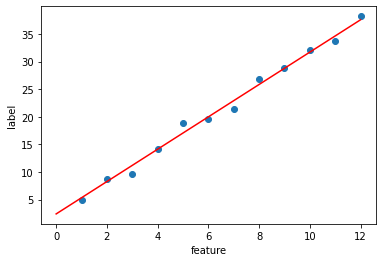

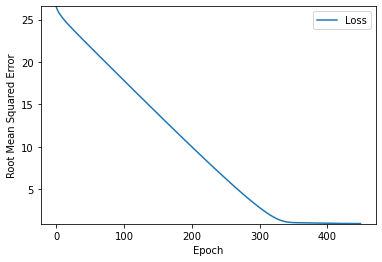

In [8]:
#@title Double-click to view a possible solution
learning_rate=0.01
epochs=450
my_batch_size=12 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# The loss curve suggests that the model does converge.

## Task 3: Increase the learning rate

In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

Epoch 1/500


C:\Users\rodri\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 326ms/step - loss: 1219.4871 - root_mean_squared_error: 34.9212
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 6635669.5000 - root_mean_squared_error: 2575.9792
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 1204.5167 - root_mean_squared_error: 34.7062
Epoch 4/500
1/1 [==============================] - 0s 11ms/step - loss: 7.3373 - root_mean_squared_error: 2.7087
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 1.7851 - root_mean_squared_error: 1.3361
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 1.6493 - root_mean_squared_error: 1.2842
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 1.5967 - root_mean_squared_error: 1.2636
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 1.5475 - root_mean_squared_error: 1.2440
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 1.4995 - root_mean_squar

1/1 [==============================] - 0s 6ms/step - loss: 127038.9141 - root_mean_squared_error: 356.4252
Epoch 72/500
1/1 [==============================] - 0s 7ms/step - loss: 104838.1641 - root_mean_squared_error: 323.7872
Epoch 73/500
1/1 [==============================] - 0s 8ms/step - loss: 94983.1250 - root_mean_squared_error: 308.1933
Epoch 74/500
1/1 [==============================] - 0s 6ms/step - loss: 94850.6250 - root_mean_squared_error: 307.9783
Epoch 75/500
1/1 [==============================] - 0s 6ms/step - loss: 103619.1562 - root_mean_squared_error: 321.8993
Epoch 76/500
1/1 [==============================] - 0s 7ms/step - loss: 121643.9766 - root_mean_squared_error: 348.7750
Epoch 77/500
1/1 [==============================] - 0s 7ms/step - loss: 149168.7656 - root_mean_squared_error: 386.2237
Epoch 78/500
1/1 [==============================] - 0s 6ms/step - loss: 183905.9844 - root_mean_squared_error: 428.8426
Epoch 79/500
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 7ms/step - loss: 170144.2969 - root_mean_squared_error: 412.4855
Epoch 140/500
1/1 [==============================] - 0s 8ms/step - loss: 168942.0781 - root_mean_squared_error: 411.0256
Epoch 141/500
1/1 [==============================] - 0s 8ms/step - loss: 168157.6875 - root_mean_squared_error: 410.0703
Epoch 142/500
1/1 [==============================] - 0s 8ms/step - loss: 167899.1875 - root_mean_squared_error: 409.7550
Epoch 143/500
1/1 [==============================] - 0s 6ms/step - loss: 168163.1875 - root_mean_squared_error: 410.0771
Epoch 144/500
1/1 [==============================] - 0s 7ms/step - loss: 168847.6094 - root_mean_squared_error: 410.9107
Epoch 145/500
1/1 [==============================] - 0s 7ms/step - loss: 169778.7969 - root_mean_squared_error: 412.0422
Epoch 146/500
1/1 [==============================] - 0s 8ms/step - loss: 170749.2656 - root_mean_squared_error: 413.2182
Epoch 147/500
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 170459.3594 - root_mean_squared_error: 412.8672
Epoch 207/500
1/1 [==============================] - 0s 7ms/step - loss: 170420.8281 - root_mean_squared_error: 412.8206
Epoch 208/500
1/1 [==============================] - 0s 10ms/step - loss: 170385.3906 - root_mean_squared_error: 412.7776
Epoch 209/500
1/1 [==============================] - 0s 6ms/step - loss: 170359.8906 - root_mean_squared_error: 412.7468
Epoch 210/500
1/1 [==============================] - 0s 7ms/step - loss: 170348.5156 - root_mean_squared_error: 412.7330
Epoch 211/500
1/1 [==============================] - 0s 6ms/step - loss: 170352.0781 - root_mean_squared_error: 412.7373
Epoch 212/500
1/1 [==============================] - 0s 7ms/step - loss: 170368.3281 - root_mean_squared_error: 412.7570
Epoch 213/500
1/1 [==============================] - 0s 8ms/step - loss: 170392.8594 - root_mean_squared_error: 412.7867
Epoch 214/500
1/1 [==========================

1/1 [==============================] - 0s 8ms/step - loss: 170419.7031 - root_mean_squared_error: 412.8192
Epoch 274/500
1/1 [==============================] - 0s 9ms/step - loss: 170418.9688 - root_mean_squared_error: 412.8183
Epoch 275/500
1/1 [==============================] - 0s 8ms/step - loss: 170418.0000 - root_mean_squared_error: 412.8171
Epoch 276/500
1/1 [==============================] - 0s 7ms/step - loss: 170416.9844 - root_mean_squared_error: 412.8159
Epoch 277/500
1/1 [==============================] - 0s 9ms/step - loss: 170416.2344 - root_mean_squared_error: 412.8150
Epoch 278/500
1/1 [==============================] - 0s 6ms/step - loss: 170415.7500 - root_mean_squared_error: 412.8144
Epoch 279/500
1/1 [==============================] - 0s 6ms/step - loss: 170415.7656 - root_mean_squared_error: 412.8145
Epoch 280/500
1/1 [==============================] - 0s 9ms/step - loss: 170416.0781 - root_mean_squared_error: 412.8148
Epoch 281/500
1/1 [===========================

1/1 [==============================] - 0s 8ms/step - loss: 170417.9219 - root_mean_squared_error: 412.8170
Epoch 341/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.8438 - root_mean_squared_error: 412.8170
Epoch 342/500
1/1 [==============================] - 0s 6ms/step - loss: 170417.8594 - root_mean_squared_error: 412.8170
Epoch 343/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.7500 - root_mean_squared_error: 412.8168
Epoch 344/500
1/1 [==============================] - 0s 6ms/step - loss: 170417.6094 - root_mean_squared_error: 412.8167
Epoch 345/500
1/1 [==============================] - 0s 6ms/step - loss: 170417.4375 - root_mean_squared_error: 412.8165
Epoch 346/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.3281 - root_mean_squared_error: 412.8163
Epoch 347/500
1/1 [==============================] - 0s 6ms/step - loss: 170417.1719 - root_mean_squared_error: 412.8162
Epoch 348/500
1/1 [===========================

1/1 [==============================] - 0s 7ms/step - loss: 170417.5000 - root_mean_squared_error: 412.8166
Epoch 408/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.4219 - root_mean_squared_error: 412.8164
Epoch 409/500
1/1 [==============================] - 0s 6ms/step - loss: 170417.3906 - root_mean_squared_error: 412.8164
Epoch 410/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.4219 - root_mean_squared_error: 412.8164
Epoch 411/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.3594 - root_mean_squared_error: 412.8164
Epoch 412/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.4062 - root_mean_squared_error: 412.8164
Epoch 413/500
1/1 [==============================] - 0s 6ms/step - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 414/500
1/1 [==============================] - 0s 5ms/step - loss: 170417.5625 - root_mean_squared_error: 412.8166
Epoch 415/500
1/1 [===========================

1/1 [==============================] - 0s 7ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 475/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 476/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 477/500
1/1 [==============================] - 0s 6ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 478/500
1/1 [==============================] - 0s 5ms/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 479/500
1/1 [==============================] - 0s 6ms/step - loss: 170417.5781 - root_mean_squared_error: 412.8167
Epoch 480/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.5000 - root_mean_squared_error: 412.8166
Epoch 481/500
1/1 [==============================] - 0s 7ms/step - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 482/500
1/1 [===========================

C:\Users\rodri\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


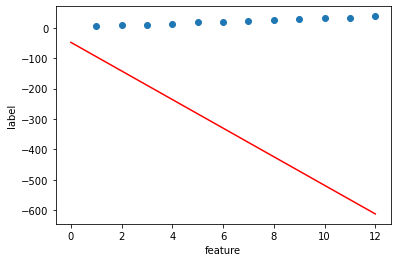

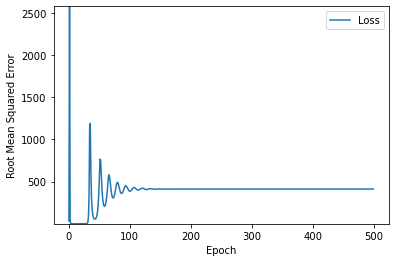

In [9]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a [roller coaster](https://www.wikipedia.org/wiki/Roller_coaster).  An oscillating loss curve strongly suggests that the learning rate is too high. 

## Task 4: Find the ideal combination of epochs and learning rate

Assign values to the following two hyperparameters to make training converge as efficiently as possible: 

*  learning_rate
*  epochs

Epoch 1/50


C:\Users\rodri\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 305ms/step - loss: 375.3706 - root_mean_squared_error: 19.3745
Epoch 2/50
1/1 [==============================] - 0s 8ms/step - loss: 281.1374 - root_mean_squared_error: 16.7672
Epoch 3/50
1/1 [==============================] - 0s 8ms/step - loss: 225.3309 - root_mean_squared_error: 15.0110
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 185.3278 - root_mean_squared_error: 13.6135
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 154.3974 - root_mean_squared_error: 12.4257
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 129.5076 - root_mean_squared_error: 11.3801
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 108.9952 - root_mean_squared_error: 10.4401
Epoch 8/50
1/1 [==============================] - 0s 6ms/step - loss: 91.8341 - root_mean_squared_error: 9.5830
Epoch 9/50
1/1 [==============================] - 0s 9ms/step - loss: 77.3377 - root_mean_squared_e

C:\Users\rodri\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


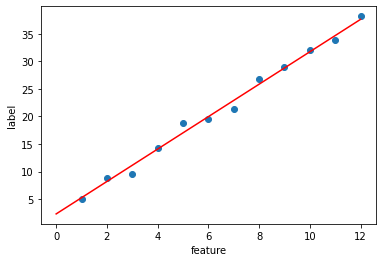

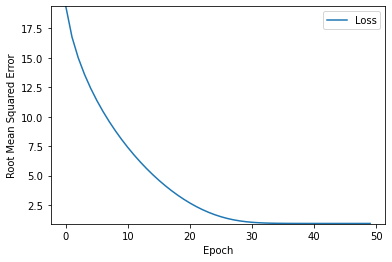

In [10]:
# Set the learning rate and number of epochs
learning_rate= 0.1
epochs= 50

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/70


C:\Users\rodri\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 339ms/step - loss: 745.6600 - root_mean_squared_error: 27.3068
Epoch 2/70
1/1 [==============================] - 0s 6ms/step - loss: 559.5504 - root_mean_squared_error: 23.6548
Epoch 3/70
1/1 [==============================] - 0s 7ms/step - loss: 449.1553 - root_mean_squared_error: 21.1933
Epoch 4/70
1/1 [==============================] - 0s 6ms/step - loss: 369.9172 - root_mean_squared_error: 19.2332
Epoch 5/70
1/1 [==============================] - 0s 6ms/step - loss: 308.5739 - root_mean_squared_error: 17.5663
Epoch 6/70
1/1 [==============================] - 0s 9ms/step - loss: 259.1489 - root_mean_squared_error: 16.0981
Epoch 7/70
1/1 [==============================] - 0s 9ms/step - loss: 218.3649 - root_mean_squared_error: 14.7772
Epoch 8/70
1/1 [==============================] - 0s 8ms/step - loss: 184.1990 - root_mean_squared_error: 13.5720
Epoch 9/70
1/1 [==============================] - 0s 8ms/step - loss: 155.2981 - root_mean_square

C:\Users\rodri\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


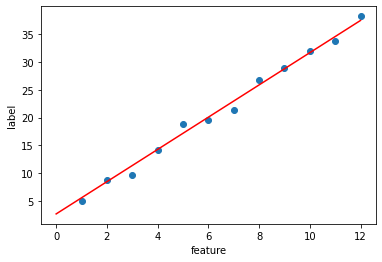

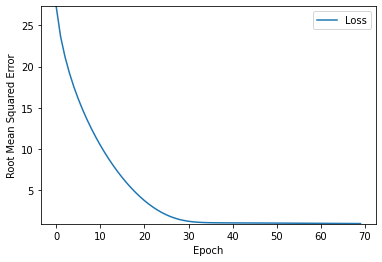

In [11]:
#@title Double-click to view a possible solution

learning_rate=0.14
epochs=70
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 5: Adjust the batch size

The system recalculates the model's loss value and adjusts the model's weights and bias after each **iteration**.  Each iteration is the span in which the system processes one batch. For example, if the **batch size** is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.  

One **epoch** spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.  

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge. 

Experiment with `batch_size` in the following code cell. What's the smallest integer you can set for `batch_size` and still have the model converge in a hundred epochs?

Epoch 1/100


C:\Users\rodri\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


12/12 [==============================] - 1s 2ms/step - loss: 135.9445 - root_mean_squared_error: 11.6595
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 56.6436 - root_mean_squared_error: 7.5262
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 20.9843 - root_mean_squared_error: 4.5809
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 6.1721 - root_mean_squared_error: 2.4844
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1.8609 - root_mean_squared_error: 1.3641
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 1.1201 - root_mean_squared_error: 1.0584
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1.1610 - root_mean_squared_error: 1.0775
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1.1795 - root_mean_squared_error: 1.0860
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 1.2170 - root_mean_squ

12/12 [==============================] - 0s 2ms/step - loss: 1.1318 - root_mean_squared_error: 1.0639
Epoch 73/100
12/12 [==============================] - 0s 2ms/step - loss: 1.1028 - root_mean_squared_error: 1.0502
Epoch 74/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0344 - root_mean_squared_error: 1.0170
Epoch 75/100
12/12 [==============================] - 0s 2ms/step - loss: 1.1633 - root_mean_squared_error: 1.0785
Epoch 76/100
12/12 [==============================] - 0s 2ms/step - loss: 1.2567 - root_mean_squared_error: 1.1210
Epoch 77/100
12/12 [==============================] - 0s 4ms/step - loss: 1.1541 - root_mean_squared_error: 1.0743
Epoch 78/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0859 - root_mean_squared_error: 1.0420
Epoch 79/100
12/12 [==============================] - 0s 2ms/step - loss: 1.1936 - root_mean_squared_error: 1.0925
Epoch 80/100
12/12 [==============================] - 0s 2ms/step - loss: 1.2227 - root_mean_

C:\Users\rodri\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


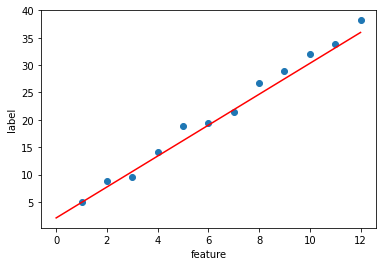

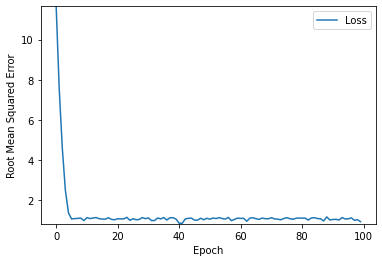

In [12]:
learning_rate=0.05
epochs=100
my_batch_size= 1

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/125


C:\Users\rodri\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


12/12 [==============================] - 0s 2ms/step - loss: 788.8433 - root_mean_squared_error: 28.0864
Epoch 2/125
12/12 [==============================] - 0s 2ms/step - loss: 554.4241 - root_mean_squared_error: 23.5462
Epoch 3/125
12/12 [==============================] - 0s 2ms/step - loss: 398.6378 - root_mean_squared_error: 19.9659
Epoch 4/125
12/12 [==============================] - 0s 3ms/step - loss: 275.5648 - root_mean_squared_error: 16.6001
Epoch 5/125
12/12 [==============================] - 0s 2ms/step - loss: 178.5387 - root_mean_squared_error: 13.3618
Epoch 6/125
12/12 [==============================] - 0s 2ms/step - loss: 107.8195 - root_mean_squared_error: 10.3836
Epoch 7/125
12/12 [==============================] - 0s 2ms/step - loss: 56.2412 - root_mean_squared_error: 7.4994
Epoch 8/125
12/12 [==============================] - 0s 2ms/step - loss: 25.0516 - root_mean_squared_error: 5.0052
Epoch 9/125
12/12 [==============================] - 0s 2ms/step - loss: 8.5386 

12/12 [==============================] - 0s 2ms/step - loss: 1.0441 - root_mean_squared_error: 1.0218
Epoch 73/125
12/12 [==============================] - 0s 2ms/step - loss: 1.2128 - root_mean_squared_error: 1.1013
Epoch 74/125
12/12 [==============================] - 0s 2ms/step - loss: 1.2371 - root_mean_squared_error: 1.1123
Epoch 75/125
12/12 [==============================] - 0s 2ms/step - loss: 1.2514 - root_mean_squared_error: 1.1187
Epoch 76/125
12/12 [==============================] - 0s 2ms/step - loss: 1.1033 - root_mean_squared_error: 1.0504
Epoch 77/125
12/12 [==============================] - 0s 2ms/step - loss: 1.3298 - root_mean_squared_error: 1.1532
Epoch 78/125
12/12 [==============================] - 0s 2ms/step - loss: 1.1905 - root_mean_squared_error: 1.0911
Epoch 79/125
12/12 [==============================] - 0s 1ms/step - loss: 1.0340 - root_mean_squared_error: 1.0168
Epoch 80/125
12/12 [==============================] - 0s 1ms/step - loss: 1.1958 - root_mean_

C:\Users\rodri\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


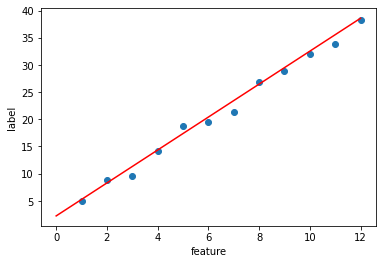

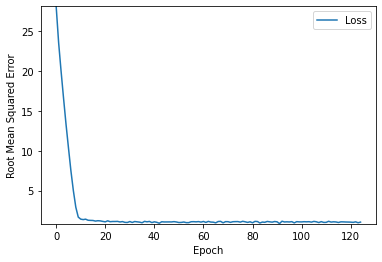

In [13]:
#@title Double-click to view a possible solution

learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero. 
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory. 

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.